<a href="https://colab.research.google.com/github/Garlid/Exploratory-Data-Analysis/blob/main/FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# Data Scientist Susannah Bear Garlid Note: to be able to read the data in the following cell, we must first mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
# Data Scientist Susannah Bear Garlid Note: the correct file path must be used to properly read the data
df = pd.read_csv('/content/drive/MyDrive/Data Science/Project Assessment - FoodHub/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape

(1898, 9)



```
# This is formatted as code
```

#### Observations:
The dataset has 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Our DataFrame consists of the following:
1) Nominal Data: We have 1898 order id's. Although the data type is int64, these can be considered nominal as they are simply meant to identify the order rather than place the order in a particular rank. As with order_id, customer_id is a nominal value meant to identify the customer rather than rank the customers in an ascending or descending order. restaurant_name, cuisine_type, and day_of_the_week are also categorical or nominal data points.
2) Continuous Variables: We have 3 columns consisting of continuous variables, ie, cost_of_the_order, food_preparation_time, and delivery_time.
3) Ordinal Data: We have 1 column consisting of ordinal data: rating. The data in the column rating has a data type of object, so it may be surprising that we are saying it is an ordinal data type. This is because the rating can be ordered. For example, row 2 (index 2) of our DataFrame has a rating of 5. Row 3 (index 3) of our DataFrame has a rating of 3. We can say that row 2 has a higher or more favorable rating than row 3. The ratings can be ordered and therefore it is of an ordinal data type.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
missing_counts = df.isnull().sum()
print(missing_counts)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:
To check for missing values, we can use the .isnull() function in combination with the .sum() function.
The output, as we see, reveals there are no missing values in our DataFrame. We can also check this against the ouput of df.info() in the previous code cell. From df.info(), we can see there are 1898 entries. The Non-Null Count shows that all rows and all columns contain data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe(include='all')

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


#### Observations:
The minimum amount of time it takes for food to be prepared once an order is placed is 20 minutes. The average amount of time it takes for food to be prepared is 27.371970 minutes, or we can round to about 27 minutes. The maximum amount of time for food preparation is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
# Orders that are not rated have "Not given" entered where the rating should be. Therefore, we can use the .count() and .sum() functions for this.
rating = 'Not given'
count = df['rating'].str.count(rating).sum()
print('The number of orders that were not rated is',count)

The number of orders that were not rated is 736


#### Observations:
The number of orders that were not given a rating was 736. That means that 1162 of the 1898 orders were given a rating by the customer.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Text(0, 0.5, 'Frequency')

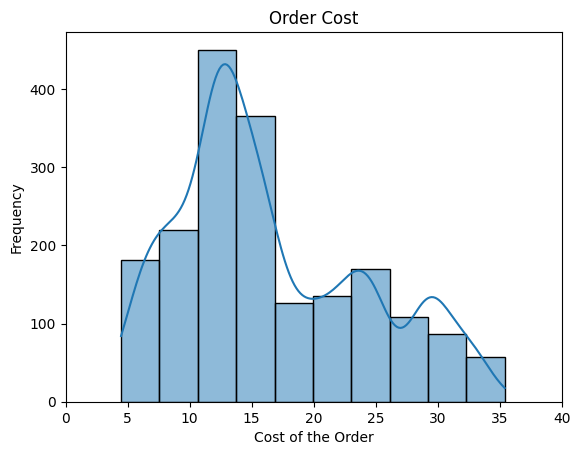

In [ ]:
# Write the code here
# We will first  begin by using a histogram to explore each continuous variable, ie, cost_of_the_order, food_preparation_time, and delivery_time.
# Note that this cell contains just one variable. Subsequent code cells will contain the rest of the variables.

# cost_of_the_order
sns.histplot(data=df, x='cost_of_the_order',bins=10, kde=True)
plt.title('Order Cost')
plt.xlim(0,40)
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

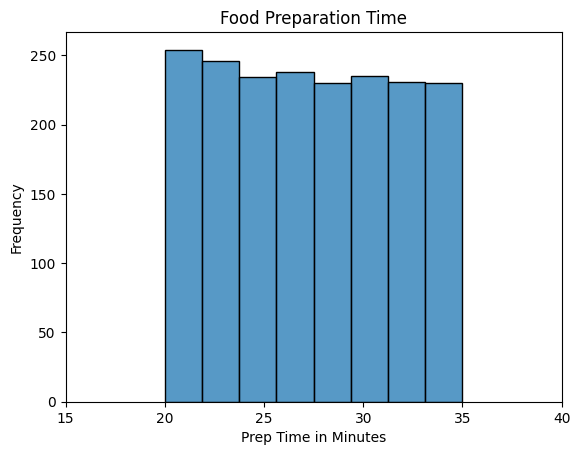

In [ ]:
# Histogram for food_preparation_time
sns.histplot(data=df, x='food_preparation_time',bins=8)
plt.title('Food Preparation Time')
plt.xlim(15,40)
plt.xlabel('Prep Time in Minutes')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

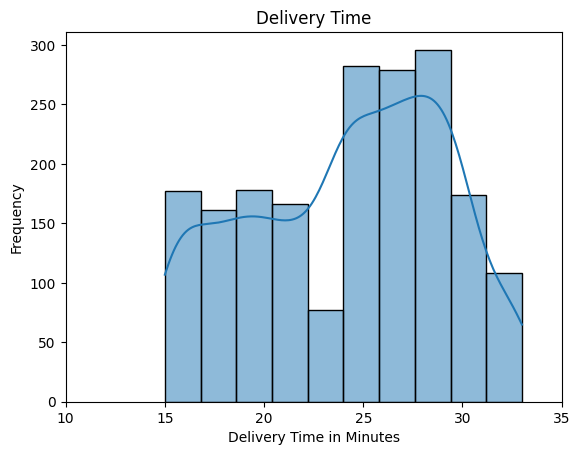

In [ ]:
# Histogram for delivery_time
sns.histplot(data=df, x='delivery_time', bins=10, kde=True)
plt.title('Delivery Time')
plt.xlim(10,35)
plt.xlabel('Delivery Time in Minutes')
plt.ylabel('Frequency')

Text(0.5, 0, 'Cost')

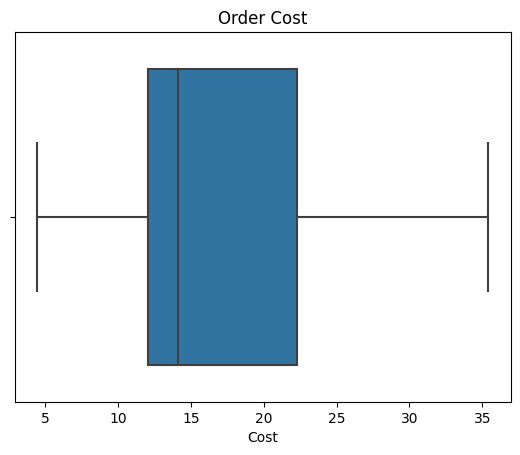

In [ ]:
# Now we will look at the same variables using boxplots
sns.boxplot(data=df, x='cost_of_the_order')
plt.title('Order Cost')
plt.xlabel('Cost')

Text(0.5, 0, 'Prep Time in Minutes')

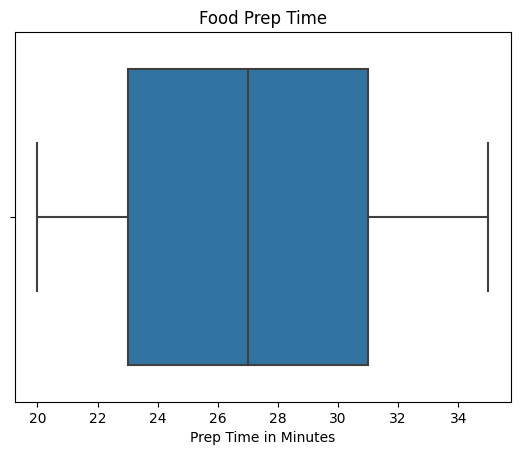

In [ ]:
# Boxplot for food_preparation_time
sns.boxplot(data=df, x='food_preparation_time')
plt.title('Food Prep Time')
plt.xlabel('Prep Time in Minutes')

Text(0.5, 0, 'Delivery Time in Minutes')

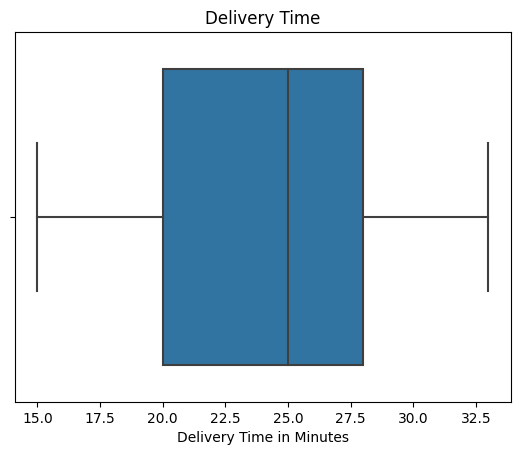

In [ ]:
# Boxplot for delivery_time
sns.boxplot(data=df, x='delivery_time')
plt.title('Delivery Time')
plt.xlabel('Delivery Time in Minutes')


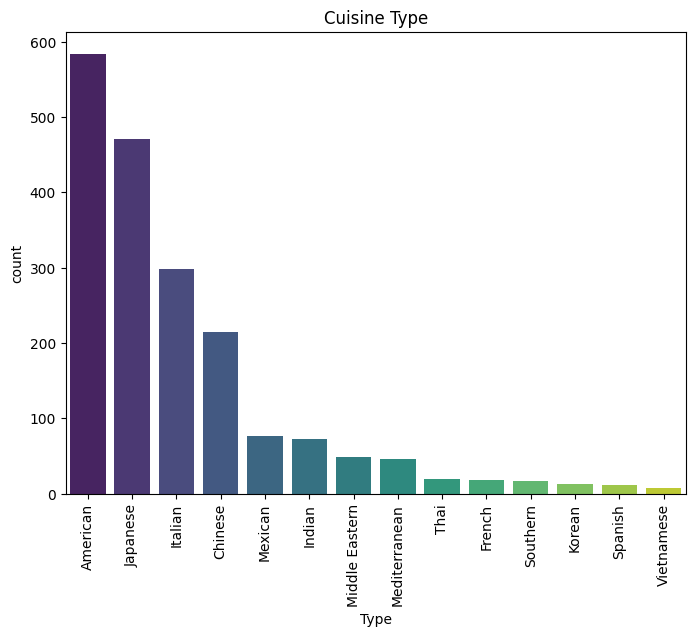

In [ ]:
# Next we will use count plots for nominal variable cuisine_type
# Count plot for restaurant_name
category_order = df['cuisine_type'].value_counts().index

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cuisine_type', order=category_order, palette='viridis')


plt.title('Cuisine Type')
plt.xlabel('Type')
plt.xticks(rotation=90)
plt.show()

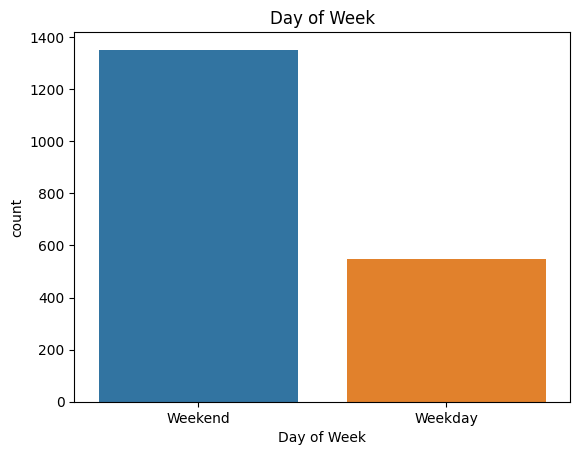

In [ ]:
# Count plot for day_of_the_week
sns.countplot(data=df, x='day_of_the_week')
plt.title('Day of Week')
plt.xlabel('Day of Week')
plt.show()

#### Observations:
cost_of_the_order
From our histogram, we can see most orders fall between $10-$15, that is,
the mode, or most frequent cost of the orders is between $10-$15. The box plot
shows us that the median cost is betwee $10-$15. This boxplot is positively skewed,or skewed right since the whisker is shorter on the left side. This tells us there the peak is on the cheaper side but there is a fairly long tail to the right wherein customers do purchase more expensive meals.  

food_prep_time
The food_prepartion_time histogram is symmetric, that is, the left and right sides mirror reach other. The boxplot refelcts the symmetry, where the left and right whiskers are fairly even.
The median line is also diredctly in the center of the inner quartile range. The distribution for food prep time is uniform between 20-35 minutes.

delivery_time
Similar to food_prep_time, the histogram for delivery_time reveals 2 peaks or modes, the first between 15-20 minutes and the second between 25-30 minutes. The boxplot for delivery_time is skewed to the left, where the median is closer to the third quartile.

cuisine_type
The cuisine type countplot shows that the two most common types are American and Japanese, while Vietnamese is the least commonly purchased.

day_of_the_week
Finally, from the Day of Week countplot we see most purchases and deliveries are on the weekends.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

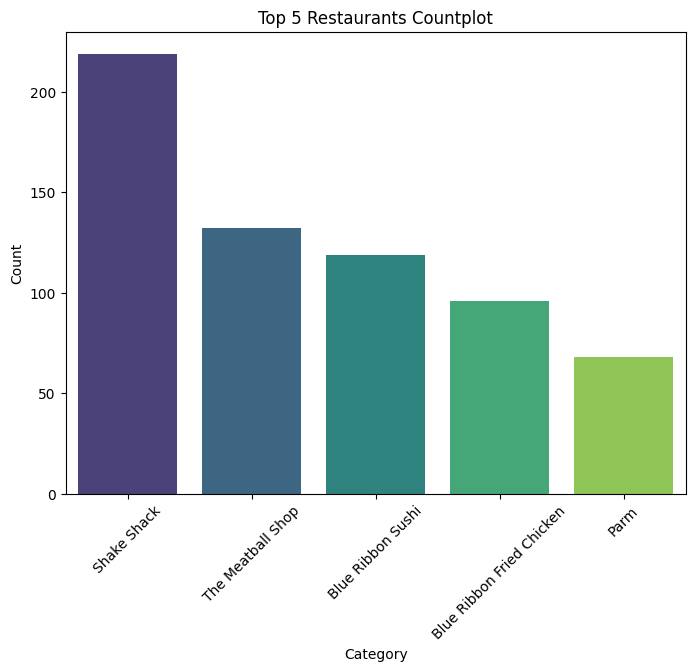

In [ ]:
# Write the code here
top_n = 5
top_categories = df['restaurant_name'].value_counts().head(top_n).index
df_filtered = df[df['restaurant_name'].isin(top_categories)]

plt.figure(figsize=(8, 6))

sns.countplot(data=df_filtered, x='restaurant_name', order=top_categories, palette='viridis')

plt.title(f'Top {top_n} Restaurants Countplot')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.show()


#### Observations:
The Shake Shack appears to have the most orders. Following the Shake Shack, The Meatball Shop comes in second. The least popular of the top 5 is Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

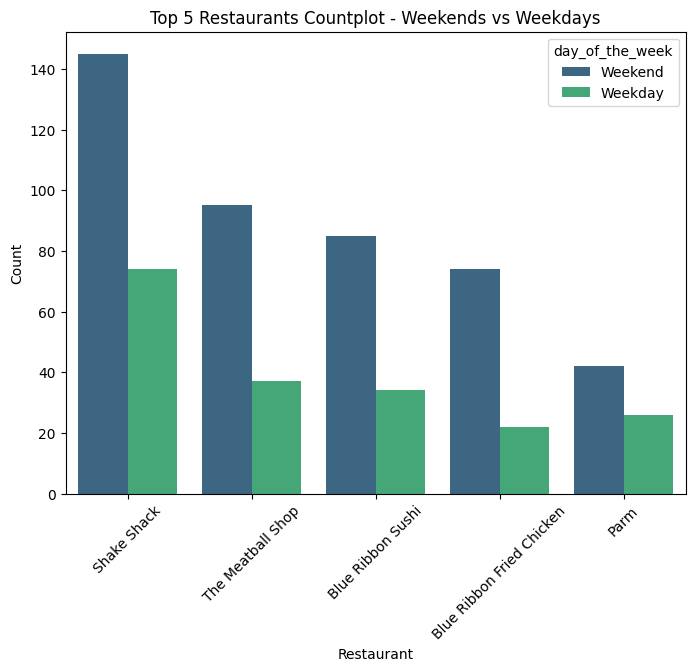

In [ ]:
# Write the code here
top_n = 5
top_categories = df['restaurant_name'].value_counts().head(top_n).index
df_filtered = df[df['restaurant_name'].isin(top_categories)]

plt.figure(figsize=(8, 6))

sns.countplot(data=df_filtered, x='restaurant_name', hue = 'day_of_the_week', order=top_categories, palette='viridis')

plt.title(f'Top {top_n} Restaurants Countplot - Weekends vs Weekdays')
plt.xlabel('Restaurant')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.show()

#### Observations:
Like the Top 5 Restaurants Countplot, from looking at the countplot above, we again see the most popular restaurant on the weekends is the Shake Shack.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
cost = 20
percentage_greater = (df['cost_of_the_order'] > cost).mean() * 100
print(f"The percentage of order costs greater than ${cost} is: {percentage_greater:.2f}%")


The percentage of order costs greater than $20 is: 29.24%


#### Observations:
The output from the code above shows that 29.24% of the orders are greater than $20.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
mean = df['delivery_time'].mean()
rounded = round(mean,2)
print('The approximate time for delivery is',rounded,'minutes.')

The approximate time for delivery is 24.16 minutes.


#### Observations:
The mean delivery time is just a little over 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

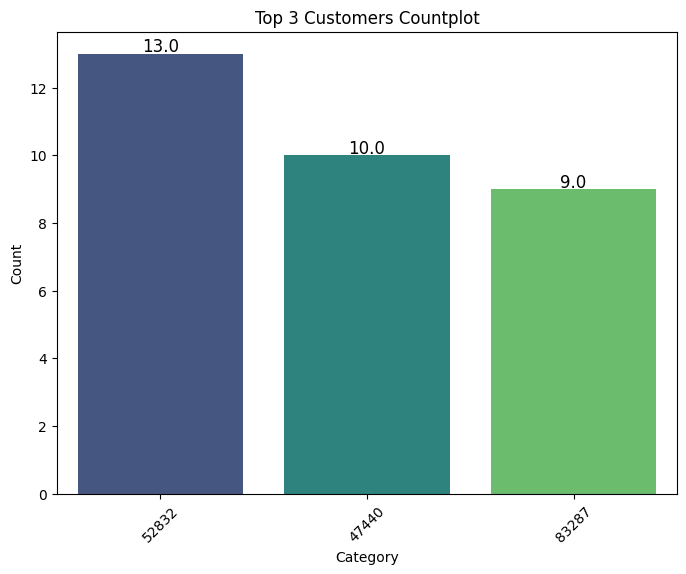

In [ ]:
# Write the code here
top_n = 3
top_customers = df['customer_id'].value_counts().head(top_n).index
df_filtered = df[df['customer_id'].isin(top_customers)]

plt.figure(figsize=(8, 6))

visual = sns.countplot(data=df_filtered, x='customer_id', order=top_customers, palette='viridis')

# The for loop utilizes the .patches attribute so we can customize the count plot. In this case, we wanted to add the counts for each bar to better see how many times the customer ordered food.
for p in visual.patches:
    visual.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')


plt.title(f'Top {top_n} Customers Countplot')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.show()

#### Observations:
Customer with id 52832 had the most orders. That customer ordered 13 times. The customer with id 47440 ordered 10 times, and the customer with id 83287 ordered 9 times.

### Multivariate Analysis


### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


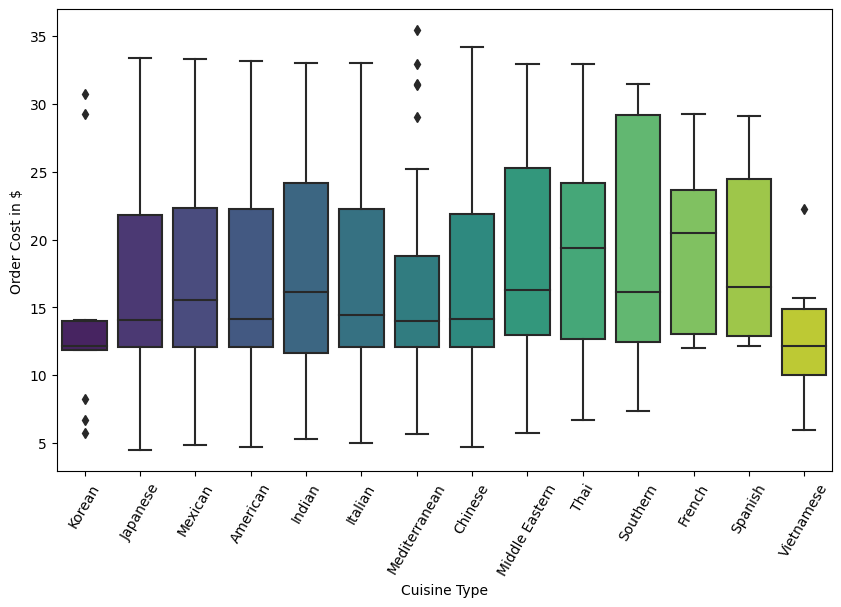

In [ ]:
# Note to the person grading this assignment: I tried for several hours to create heatmaps, barplots, and histograms for this portion of the assignment.
# I got close, but eventually I needed to reference the low code version of this assignment for help. I modified the plots in an effort to utilize the python skills I am acquiring.

# To begin our multi-variate analysis, we will start by looking at the relationship between cuisine type and cost of the order to see if there is any direct correlation.
plt.figure(figsize=(10,6))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'viridis')
plt.xlabel('Cuisine Type')
plt.xticks(rotation = 60)
plt.ylabel('Order Cost in $')
plt.show()

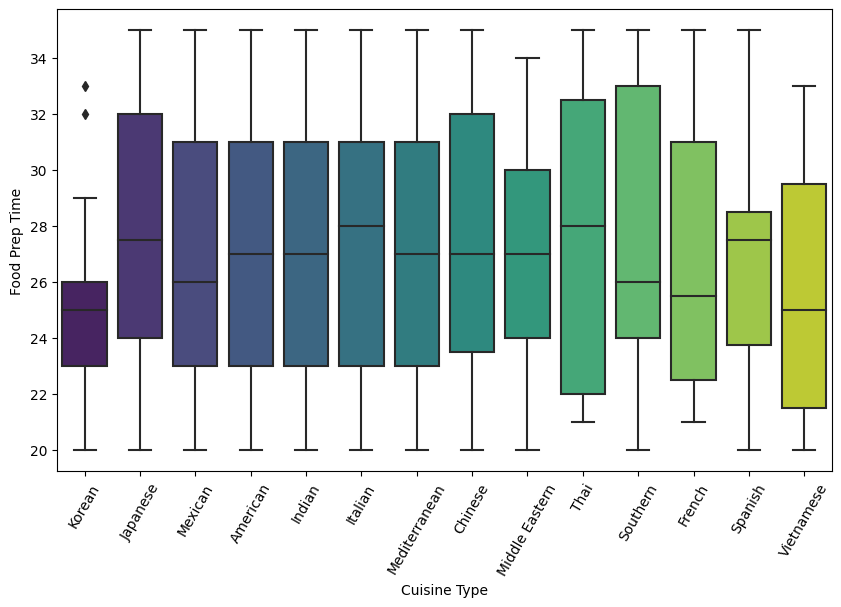

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(10,6))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'viridis')
plt.xlabel('Cuisine Type')
plt.xticks(rotation = 60)
plt.ylabel('Food Prep Time')
plt.show()

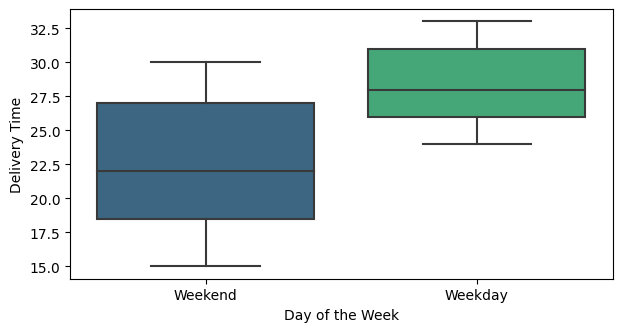

In [ ]:
# Here we will create a boxplot to see if there is a difference between delivery time on the weekends and delivery time on weekdays
plt.figure(figsize=(7,3.5))
sns.boxplot(x='day_of_the_week', y='delivery_time', data = df, palette = 'viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.show()

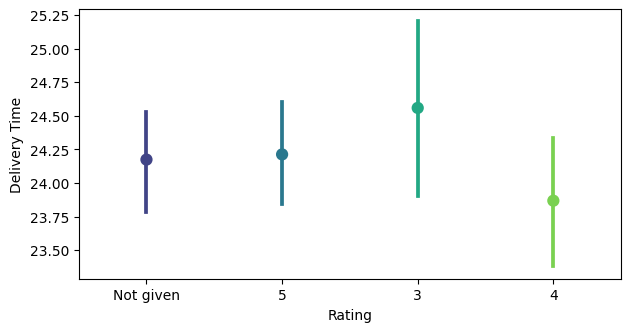

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(7, 3.5))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df, palette = 'viridis')
plt.xlabel('Rating')
plt.ylabel('Delivery Time')
plt.show()

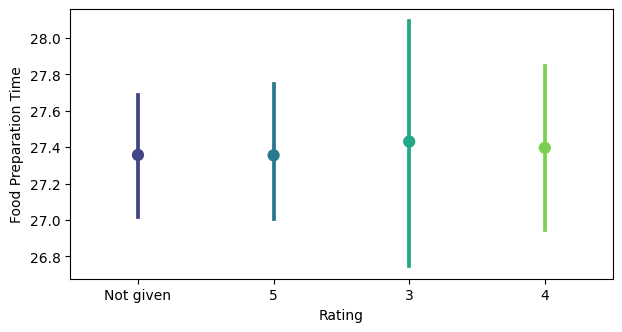

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(7, 3.5))
sns.pointplot(x='rating', y='food_preparation_time',data=df, palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Food Preparation Time')
plt.show()

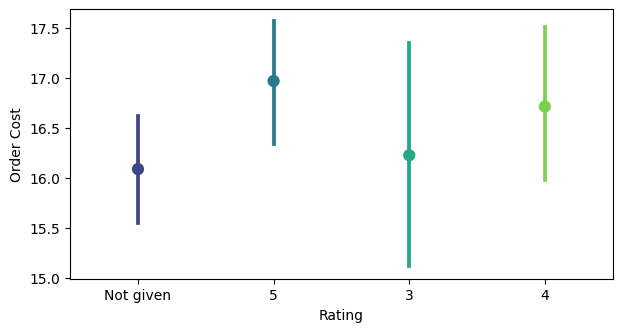

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(7, 3.5))
sns.pointplot(x='rating', y='cost_of_the_order', data=df, palette = 'viridis')
plt.xlabel('Rating')
plt.ylabel('Order Cost')
plt.show()

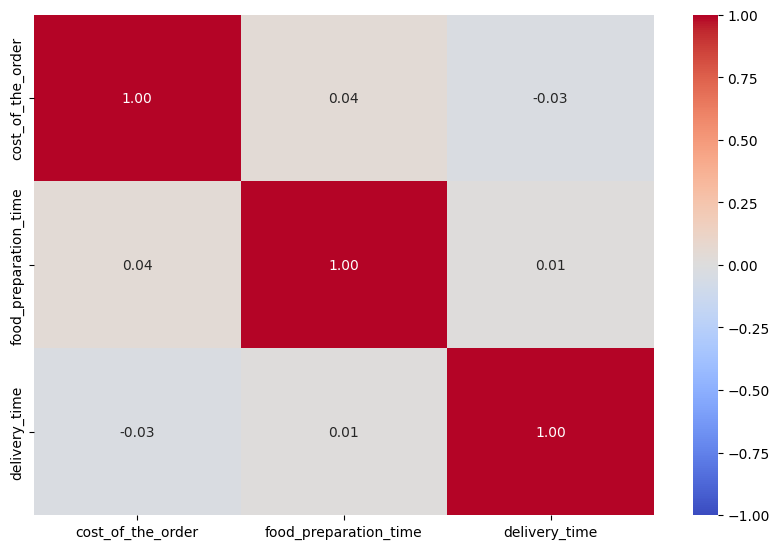

In [ ]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(10,6.5))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm")
plt.show()

In [ ]:
# To find the revenue generated by each restaurant, we can use the groupby function and sum function, as shown below.
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

### Observations:
First, looking at the plot for cuisine type and cost, the cuisine type with the widest range between the highest and lowest cost (excluding outliers) is Chinese. The highest customers pay for Chinese is around $35, while the lowest is less that $5. The median for Chinese is on par with Mediterranean, Italian, American, and Japanese, which is slightly less than $15. The cuisine type with the highest median is French (~$20), and Korean has the lowest median at around $12.

Second, looking at the plot for cuisine type and food prep time, we see that Korean, on average, takes the least amount of time to prepare. The range for food prep time for Korean, excluding outliers, is between 20 and 29 minutes. Thai food appears to take the longest time to prepare, with a min prep time of 21 minutes median prep time of about 29 minutes. We can compare this with Italian, which also take about 29 minutes on average (median) to prepare, but the difference is that the minimum prep time for Italian is 20 minutes rather than 21.

Third, the boxlot for comparing the day of the week and delivery time shows that the delivery time on the weekdays has a smaller range than on the weekends, but the weekends appear to have faster delivery times altogether.

Fourth, the point plot for rating and delivery time shows that the orders with a rating of 5 have a mean delivery time of about 24.25 minutes. The confidence interval stretches between 23.75 and 24.75 minutes. The interesting thing is that orders with a rating of 4 had a shorter delivery time. It appears, based on this plot, that the rating is not solely dependent on the delivery time, though that may be a contributing factor.

As with delivery time and rating, the food prep time and rating point plot does not show strong correlation between food prep time and rating, as orders with no rating given, a rating of 5 and a rating of 4 all have about the same mean.

In the sixth plot, we see the orders with a rating of 4 or 5 have a mean order cost right around $17, while the orders with a rating of 3 are less than $16.5. But, it is noteworthy that the range of order costs for the orders with a rating of 3 is a wider range than those with a rating of 4 or 5.

With the heatmap, we see the strongest correlation between cost of the order and food preparation time.

Lastly, from using our groupby() and .sum() functions, we can see the revnue of the top 15 restaurants. It is no surprise that Shake Shack comes in first as the restuarant with the highest revenue.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Note: I referenced the low code version for this portion of the question.
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# To get the restaurants with a rating count greater than 50, we can create another dataframe, "subset", and extract the relevant restaurants from there.
df_rating_count['rating']>50
subset = df_rating_count[df_rating_count['rating'] > 50]
print(subset['restaurant_name'])

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object


#### Observations:
The restuarants with more than 50 ratings include the Shake Shack (which seems to be the most popular restaurant), the Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
# Note: Used Low Code version here.

def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) # Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
#Get the total revenue and print it
# Note: Used low code version here.
total_rev = df['Revenue'].sum() # Write the appropriate function to get the total revenue
print('The net revenue is around',total_rev, 'dollars')

The net revenue is around 6166.303 dollars


#### Observations:
The total revenue of the company is $6,166.30.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
# Note: Used low code here.
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


# Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)

df_greater_than_60 = df[df['total_time']>60]

print('The number of orders that take longer than 60 minutes to get delivered is:', df_greater_than_60.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100

print("Percentage of orders that take longer than 60 minutes:", round(percentage, 2), '%')

The number of orders that take longer than 60 minutes to get delivered is: 200
Percentage of orders that take longer than 60 minutes: 10.54 %


#### Observations:
The number of orders that take more than an hour to be delivered to the customer for the time the order is placed is 200, or a little more than 10% of the orders in our sample data.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
# Used low code.
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

# Write the code below to get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### Observations:
The average (mean) time it takes to deliver food on the weekends is less than weekdays by 6 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The most purchased cuisine type is American.
*  The restaurant that is most popular is the Shake Shack
*  The Shake Shack generates the most revenue. In this dataset, we see the Shake Shack brought in $3579.53 in revenue.
*  The second most popular restaurant is The Meatball Shop.
*  The MeatBall Shop brought in $2145.21 in revenue.

### Recommendations:

*  The company should provide a promotional offer in the advertisement of restaurants to the Shake Shack, The Meatball Shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken, as these are the restaurants that bring in the most revenue.
* Since the company earns 25% from orders of $20 or more, the company can promote more expensive items from the menus of the aforementioned restaurants.
* The company should focus its promotional efforts on restaurants whose cuisine type is American and whose ratings are between 4 and 5.

---